# 고객을 세그먼테이션하자! - 2

## 이상 데이터 분석 및 처리

In [1]:
# 라이브러리 불러오기 
import pandas as pd 

# 데이터 불러오기
user_data = pd.read_csv('user_data.csv')

# 데이터의 상위 5번째 행까지 출력
user_data.head()

CustomerID  purchase_cnt  item_cnt  recency  user_total  user_average  \
0       13307             1         4      120        15.0          15.0   
1       17925             1        72      372       244.1         244.1   
2       14300             1        32       18        43.2          43.2   
3       15160             1        84      357       158.2         158.2   
4       14196             1       142      106       335.5         335.5   

   unique_products  average_interval  total_transactions  cancel_frequency  \
0                1               0.0                   1                 0   
1                1               0.0                   1                 0   
2                3               0.0                   1                 0   
3                4               0.0                   1                 0   
4                6               0.0                   1                 0   

   cancel_rate  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0

**이상치 데이터는 클러스터링 결과를 어떻게 왜곡하는가?**

클러스터링: 비슷한 특성을 가진 데이터 포인트들을 같은 그룹으로 묶는 작업  
예를 들어 키를 기준으로 학생들을 그룹화한다고 생각해 봅시다. 초등학교에 다니는 학생 중 하나가 성인보다 큰 키를 가지고 있다고 가정한다.  
이 학생의 키는 이상치 데이터이므로 초등학생들의 키 클러스터링을 왜곡시킬 수 있다.

일반적인 학생들의 키 클러스터는 비슷한 키를 가진 학생들끼리 모여 있을 것이라고 예상할 수 있다.  
그러나 이상치인, 성인보다 큰 키를 가진 학생이 있으면 이 학생은 자신만의 클러스터를 형성할 수 있다.   
클러스터링은 '비슷한 특성을 가진 데이터 포인트들을 같은 그룹으로 묶는' 것인데, 혼자 튀는 데이터인 경우 혼자만의 그룹을 생성하게 되는 것이다.


이런 경우, 한 학생을 제외한 나머지 학생들은 모두 다른 하나의 그룹으로 묶일 수도 있다.  
학생들의 키를 고루 분포시켜서 그룹을 짓고 싶었던 것인데, 이상치 데이터로 인해 클러스터링 결과가 예상했던 것과 같이 잘 나오지 않게 될 수 있다.  


이상치 데이터는 클러스터링에서 다른 데이터 포인트들을 크게 벗어나는 값으로 작용하게 하여, 정확한 그룹 형성을 어렵게 만들 수 있다.   
따라서 이상치를 식별하고 처리하는 것은 데이터 분석에서 중요한 과정 중 하나이다. 

### 이상치 찾기

In [2]:
from scipy import stats
import numpy as np

In [3]:
# Z-score 계산 
z_scores = stats.zscore(user_data.iloc[:, 1:], axis=0)  

# Z-score 절대값 계산
z_scores = np.abs(z_scores)

# Z-score 출력
z_scores

purchase_cnt   item_cnt   recency  user_total  user_average  \
0         0.439709   0.238483  0.280229    0.227415      0.781746   
1         0.439709   0.223918  2.776234    0.199696      0.196009   
2         0.439709   0.232485  0.730059    0.224003      0.709647   
3         0.439709   0.221347  2.627662    0.210089      0.415628   
4         0.439709   0.208924  0.141562    0.188637      0.037673   
...            ...        ...       ...         ...           ...   
4357     12.443182   7.830150  0.908345    6.943606      0.464406   
4358     13.213953   1.031284  0.898440    1.160542      0.585155   
4359     18.058801   4.604325  0.898440    4.593640      0.217058   
4360     23.344089   4.797746  0.908345    3.378712      0.468758   
4361     26.096844  16.216012  0.898440   15.350522      0.540318   

      unique_products  average_interval  total_transactions  cancel_frequency  \
0            0.704913          0.295648            0.439709          0.271913   
1            0.704913          0.295648            0.439709          0.271913   
2            0.681482          0.295648            0.439709          0.271913   
3            0.669766          0.295648            0.439709          0.271913   
4            0.646335          0.295648            0.439709          0.271913   
...               ...               ...                 ...               ...   
4357         5.972927          0.284170           12.443182         15.347322   
4358         8.995527          0.285053           13.213953         11.024141   
4359        14.864996          0.292116           18.058801         18.275929   
4360        19.984673          0.289468           23.344089          5.724757   
4361        20.265845          0.291233           26.096844         30.687642   

      cancel_rate  
0        0.254139  
1        0.254139  
2        0.254139  
3        0.254139  
4        0.254139  
...           ...  
4357     0.648298  
4358     0.363318  
4359     0.496308  
4360     0.064152  
4361     0.619800  

[4362 rows x 10 columns]

In [4]:
# 임계값(threshold) 설정
threshold = 3

# z-score 기준으로 이상치를 찾아서 outlier 컬럼에 이상치 여부 기입 (0: 정상, 1:이상치)
user_data['outlier'] = (z_scores > threshold).any(axis=1).astype(int)
user_data.head()

CustomerID  purchase_cnt  item_cnt  recency  user_total  user_average  \
0       13307             1         4      120        15.0          15.0   
1       17925             1        72      372       244.1         244.1   
2       14300             1        32       18        43.2          43.2   
3       15160             1        84      357       158.2         158.2   
4       14196             1       142      106       335.5         335.5   

   unique_products  average_interval  total_transactions  cancel_frequency  \
0                1               0.0                   1                 0   
1                1               0.0                   1                 0   
2                3               0.0                   1                 0   
3                4               0.0                   1                 0   
4                6               0.0                   1                 0   

   cancel_rate  outlier  
0          0.0        0  
1          0.0        0  
2          0.0        0  
3          0.0        0  
4          0.0        0

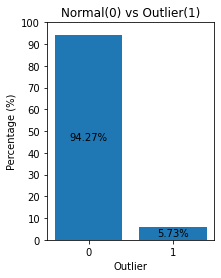

In [5]:
# 시각화에 필요한 라이브러리 불러오기
import matplotlib.pyplot as plt 

# user_data['outlier']을 활용하여 이상치 여부에 따른 확률 계산
# value_counts()는 열의 고윳값의 개수를 반환하지만 normalize=True를 사용하면 열에 있는 값의 개수 비율(상대적 빈도)을 반환함
outlier_percentage = pd.value_counts(user_data['outlier'], normalize=True) * 100

# 시각화 자료 크기 조정
plt.figure(figsize=(3, 4))

# outlier_percentage라는 데이터로 bar chart 시각화
# x축 값을 0과 1로 지정
bars = plt.bar(['0', '1'], outlier_percentage)

# 퍼센트(%) 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval/2, f'{yval:.2f}%', fontsize=10, va='center', ha='center')

plt.title('Normal(0) vs Outlier(1)') # 표 제목
plt.yticks(ticks=np.arange(0, 101, 10)) # y축 표기 (0~100까지 10단위로 증가)
plt.ylabel('Percentage (%)') # y축 범례
plt.xlabel('Outlier') # x축 범례
plt.show() # 출력

### 시각화 결과 정리

In [6]:
# 정상 데이터만 필터링 
user_data = user_data[user_data['outlier'] == 0] 

# outlier 컬럼 삭제 
user_data = user_data.drop(columns=['outlier'])

# DataFrame의 인덱스를 리셋하고, 이전 인덱스를 컬럼으로 추가하지 않음
user_data.reset_index(inplace=True, drop=True)
user_data.head()

CustomerID  purchase_cnt  item_cnt  recency  user_total  user_average  \
0       13307             1         4      120        15.0          15.0   
1       17925             1        72      372       244.1         244.1   
2       14300             1        32       18        43.2          43.2   
3       15160             1        84      357       158.2         158.2   
4       14196             1       142      106       335.5         335.5   

   unique_products  average_interval  total_transactions  cancel_frequency  \
0                1               0.0                   1                 0   
1                1               0.0                   1                 0   
2                3               0.0                   1                 0   
3                4               0.0                   1                 0   
4                6               0.0                   1                 0   

   cancel_rate  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0

## 변수 간 상관관계 분석

### 상관관계

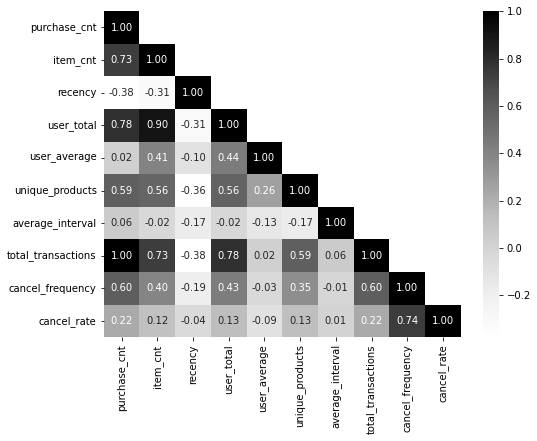

In [7]:
# 시각화 라이브러리 불러오기
import seaborn as sns  

# 'CustomerID' 열을 제외(drop)하고 상관 관계 행렬 계산(corr())
corr = user_data.drop(columns=['CustomerID']).corr()

# 행렬이 대각선을 기준으로 대칭이기 때문에 하단만 표시하기 위한 마스크 생성
mask = np.zeros_like(corr) # np.zeros_like()는 0으로 가득찬 array 생성, 크기는 corr와 동일   
mask[np.triu_indices_from(mask, k=1)] = True # array의 대각선 영역과 그 윗 부분에 True가 들어가도록 설정

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(corr, mask=mask, cmap='Greys', annot=True, fmt='.2f')
plt.show()

## 피처(feature) 스케일링

In [8]:
# Standard Scaler 불러오기 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
# 원본 데이터에 영향을 주지 않기 위해 복사 
data = user_data.copy()

# CustomerID를 제외한 데이터에 스케일링 적용
columns_list = data.iloc[:, 1:].columns # iloc: 데이터 특정 값 추출, columns: 데이터프레임의 열 이름 조회 
data[columns_list] = scaler.fit_transform(data[columns_list])

In [10]:
# 스케일링 된 데이터 출력
data.head()

CustomerID  purchase_cnt  item_cnt   recency  user_total  user_average  \
0       13307     -0.701303 -0.678393  0.257577   -0.681764     -1.300115   
1       17925     -0.701303 -0.614253  2.743765   -0.550757     -0.214122   
2       14300     -0.701303 -0.651982 -0.748738   -0.665638     -1.166439   
3       15160     -0.701303 -0.602934  2.595778   -0.599877     -0.621310   
4       14196     -0.701303 -0.548226  0.119455   -0.498492      0.219137   

   unique_products  average_interval  total_transactions  cancel_frequency  \
0        -0.950070         -0.576772           -0.701303         -0.438419   
1        -0.950070         -0.576772           -0.701303         -0.438419   
2        -0.914315         -0.576772           -0.701303         -0.438419   
3        -0.896438         -0.576772           -0.701303         -0.438419   
4        -0.860683         -0.576772           -0.701303         -0.438419   

   cancel_rate  
0    -0.476443  
1    -0.476443  
2    -0.476443  
3    -0.476443  
4    -0.476443

## 차원축소

### PCA 분석

In [11]:
# PCA 불러오기  
from sklearn.decomposition import PCA

# CustomerID를 인덱스로 지정  
data.set_index('CustomerID', inplace=True)

# PCA 적용
pca = PCA().fit(data)

In [12]:
# Explained Variance의 누적합 계산  
explained_variance_ratio = pca.explained_variance_ratio_ # explained_variance_ratio_: Explained Variance 비율을 계산해 주는 함수
cumulative_explained_variance = np.cumsum(explained_variance_ratio) # cumsum: 각 원소의 누적합을 계산하는 함수

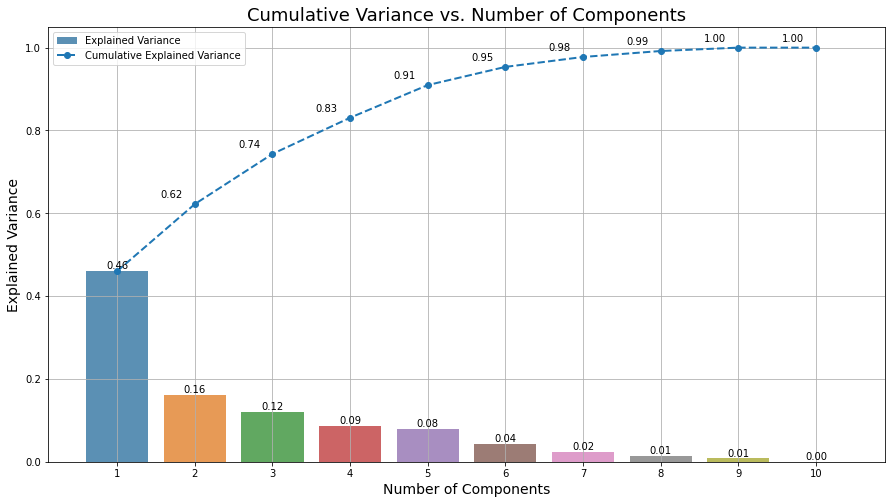

In [13]:
plt.figure(figsize=(15, 8)) 

# 각 성분의 설명된 분포에 대한 막대 그래프
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)), y=explained_variance_ratio, alpha=0.8)

# 누적 분포에 대한 선 그래프
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance, marker='o', linestyle='--', linewidth=2)

# 레이블과 제목 설정
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# 눈금 및 범례 사용자 정의
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot],
           labels=['Explained Variance', 'Cumulative Explained Variance'])  

# 두 그래프의 분산 값 표시
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()

In [14]:
# 6개의 주성분을 유지하는 PCA 선언 
pca = PCA(n_components=6)

# 기존 data를 pca에 fit_transform
data_pca = pca.fit_transform(data)

# 압축된 데이터 셋 생성
data_pca = pd.DataFrame(data_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# 인덱스로 빼 두었던 CustomerID 다시 추가
data_pca.index = data.index

In [15]:
data_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6
CustomerID                                                            
13307      -1.905288  0.431692  0.057129 -0.959072 -0.034776  0.605253
17925      -2.226088 -0.003164 -1.345513 -0.559063  1.916478 -0.312008
14300      -1.641754  0.280968  0.445835 -0.759374 -0.826429  0.955778
15160      -2.243105  0.196093 -1.164761 -0.808862  1.784427 -0.298402
14196      -1.526407 -0.440728 -0.356960  0.015909 -0.147343  0.604733

## K-Means 클러스터링

In [16]:
from sklearn.cluster import KMeans
from collections import Counter

# k=3개의 클러스터로 K-Means 클러스터링 적용
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(data_pca)

# 각 클러스터의 빈도수 구하기
cluster_frequencies = Counter(kmeans.labels_) 

# 빈도수에 기반하여 이전 레이블에서 새 레이블로의 매핑 생성
label_mapping = {label: new_label for new_label, (label, _) in 
                 enumerate(cluster_frequencies.most_common())}

# 매핑을 적용하여 새 레이블 얻기
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

# 원래 데이터셋에 새 클러스터 레이블 추가
user_data['cluster'] = new_labels

# PCA 버전의 데이터셋에 새 클러스터 레이블 추가
data_pca['cluster'] = new_labels

In [17]:
# K-Means 분류된 결과 보기
user_data.head()

CustomerID  purchase_cnt  item_cnt  recency  user_total  user_average  \
0       13307             1         4      120        15.0          15.0   
1       17925             1        72      372       244.1         244.1   
2       14300             1        32       18        43.2          43.2   
3       15160             1        84      357       158.2         158.2   
4       14196             1       142      106       335.5         335.5   

   unique_products  average_interval  total_transactions  cancel_frequency  \
0                1               0.0                   1                 0   
1                1               0.0                   1                 0   
2                3               0.0                   1                 0   
3                4               0.0                   1                 0   
4                6               0.0                   1                 0   

   cancel_rate  cluster  
0          0.0        0  
1          0.0        0  
2          0.0        0  
3          0.0        0  
4          0.0        0

In [18]:
# 각 군집별로 몇 명의 고객이 있는지 확인
user_data.value_counts('cluster')

cluster
0    2760
1    1128
2     224
dtype: int64

## 시각화 및 결과 분석

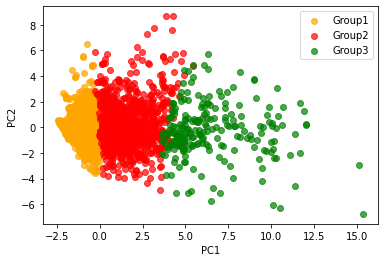

In [19]:
# 각 클러스터 별 데이터 분리 
cluster_0 = data_pca[data_pca['cluster'] == 0]
cluster_1 = data_pca[data_pca['cluster'] == 1]
cluster_2 = data_pca[data_pca['cluster'] == 2]


# 클러스터 별 시각화
# 각 클러스터에 속하는 데이터를 PC1과 PC2에 대한 좌표로 산점도
plt.scatter(cluster_0['PC1'], cluster_0['PC2'], color = 'orange', alpha = 0.7, label = 'Group1')
plt.scatter(cluster_1['PC1'], cluster_1['PC2'], color = 'red', alpha = 0.7, label = 'Group2')
plt.scatter(cluster_2['PC1'], cluster_2['PC2'], color = 'green', alpha = 0.7, label = 'Group3')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

### 3D 시각화

Plotly: 인터렉티브한 시각화가 가능한 파이썬 그래픽 라이브러리
- 기본적인 시각화부터 통계, 재무, 지리 과학 및 3-dimensional 을 포함한 40개 이상의 차트 타입을 제공하는 오픈소스
- 기본적으로 쥬피터 노트북에 시각화가 가능하며 인터렉티브한 dashboards 위해 Dash 또는 Chart Studio와 같은 라이브러리와 통합 및 확장이 가능

In [20]:
!pip install plotly==5.18.0

In [21]:
# 색상 지정 
colors = ['red', 'blue', 'green']

# 각 클러스터별 데이터 분릴
cluster_0 = data_pca[data_pca['cluster'] == 0]
cluster_1 = data_pca[data_pca['cluster'] == 1]
cluster_2 = data_pca[data_pca['cluster'] == 2]

# 3D Scatter Plot 생성
import plotly.graph_objects as go
fig = go.Figure()

# 각 클러스터별 데이터 표기 
fig.add_trace(go.Scatter3d(x=cluster_0['PC1'], y=cluster_0['PC2'], z=cluster_0['PC3'], 
                           mode='markers', marker=dict(color=colors[0], size=5, opacity=0.4), name='Group 1'))
fig.add_trace(go.Scatter3d(x=cluster_1['PC1'], y=cluster_1['PC2'], z=cluster_1['PC3'], 
                           mode='markers', marker=dict(color=colors[1], size=5, opacity=0.4), name='Group 2'))
fig.add_trace(go.Scatter3d(x=cluster_2['PC1'], y=cluster_2['PC2'], z=cluster_2['PC3'], 
                           mode='markers', marker=dict(color=colors[2], size=5, opacity=0.4), name='Group 3'))

# 범례 및 제목 영역 설정
fig.update_layout(
    title=dict(text='3D Visualization of Customer Clusters in PCA Space', x=0.5),
    scene=dict(
        xaxis=dict(backgroundcolor="grey", gridcolor='white', title='PC1'),
        yaxis=dict(backgroundcolor="grey", gridcolor='white', title='PC2'),
        zaxis=dict(backgroundcolor="grey", gridcolor='white', title='PC3'),
    ),
    width=900,
    height=800
)

fig.show()

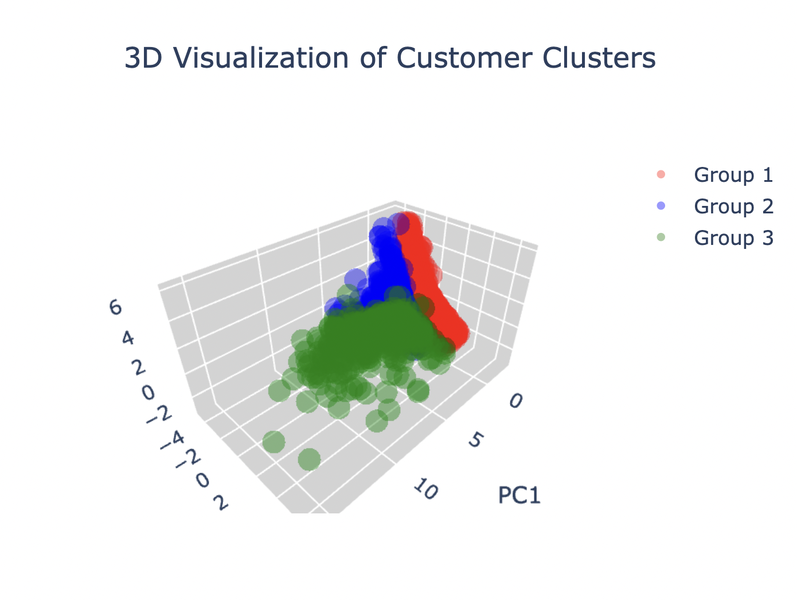

3D 시각화 결과 그룹 1, 2, 3이 선명하게 잘 구분되어 있는 것을 알 수 있다.

### 고객 세그멘테이션을 통한 인사이트와 전략

RFM 분석: Recency, Frequency, Monetary 세 기준에 따라 고객을 평가하고 분류한다.
- 이 세 점수의 합입 RFM 점수를 기준으로 고객들을 여러 그룹으로 나누어서 타겟 마케팅 전략을 세울 수 있다.
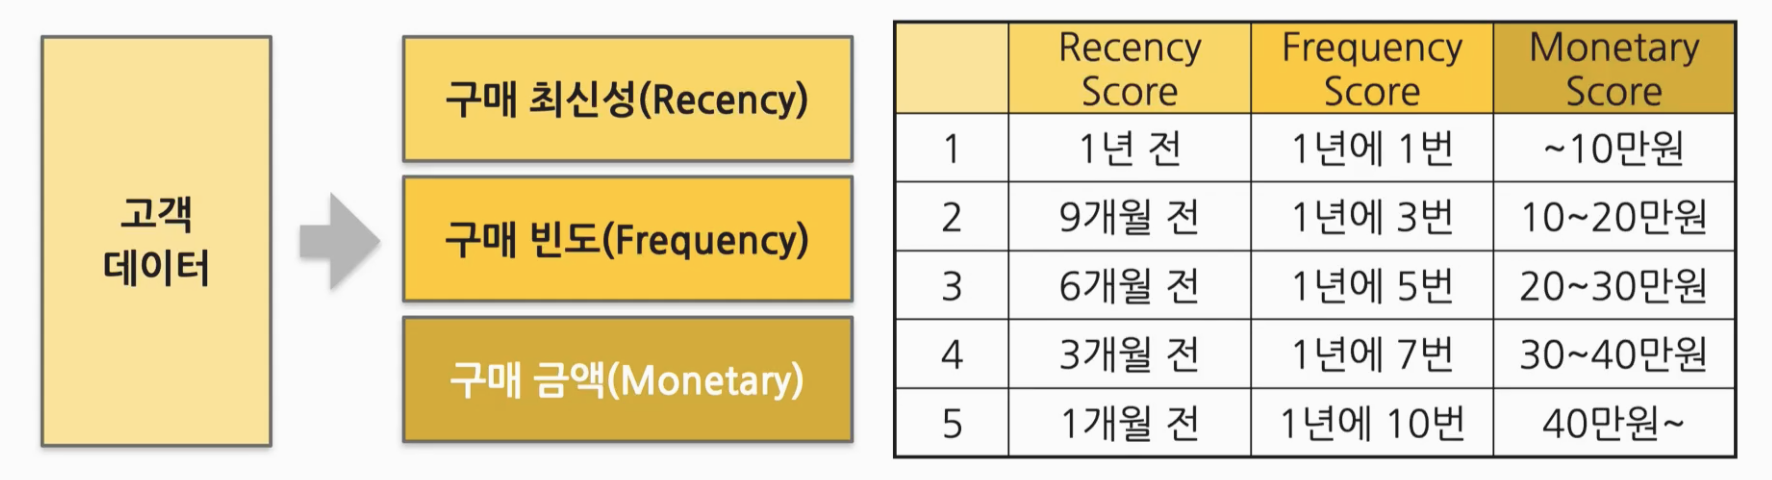

#### RFM 총점에 따른 고객 세그먼테이션

Recency, Frequency, Monetary가 각각 5점인 경우, RFM 최대값은 15이다.
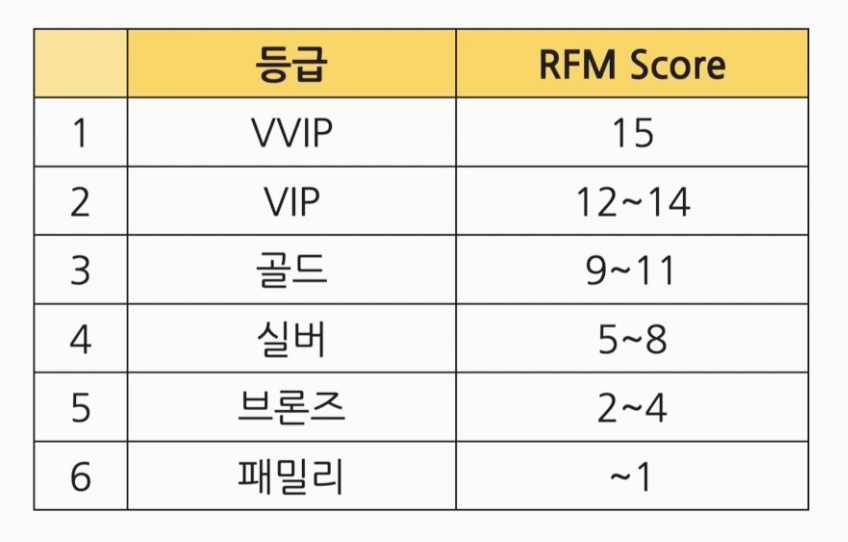

#### RFM 각 구성 요소의 점수에 따른 고객 세그먼테이션

RFM 점수의 총점이 아니라, 각 구성 요소의 점수에 따라서 그룹을 나는 것도 가능하다.

- Recency, Frequency, Monetary가 5점 만점인 경우
    - 모두 만점인 고객: VVIP
    - Recency(1점), Frequency(5점), Monetary(5점) 고객: 구매했을 때 추가 할인 제공 프로모션 진행  
    
    
RFM 점수를 기준으로 데이터 분석가나 데이터 사이언티스트 판단 하에 그룹을 나누루 수 있는 분석전략!

#### RFM 분석과 K-means 클러스터링을 사용한 고객 세그먼테이션

Recency, Frequency, Monetary 이외에도 다양한 피처들을 포함하여 고객 데이터를 분석할 수 있다.
- 더 다차원적이고 세밀한 고객 세분화가 가능하다.

1. 풍부한 데이터의 사용
    - Recency, Frequency, Monetary 세가지 요소 외에도 다양한 고객 속성을 고려할 수 있어, 보다 복잡합 고객 데이터를 분석할 때 용이하다.
      - 실제로를 Recency, Frequency, Monetary 점수를 계산하기 어려운 경우가 많다.
    - 클러스터링 기법을 활용하면 여러 개의 피러들을 그대로 사용할 수 있다.

2. 확장성
    - 풍부한 데이터를 그대로 사용할 수 있어 다양한 유형의 데이터를 처리할 수 있다.
    - 새로운 피처 추가 및 제거할 경우 편리하게 모델 재사용 가능하다.
    
3. 세밀한 세그먼테이션
    - 풍부한 데이터를 사용했기 때문에 세밀하게 고객을 세그먼테이션 가능하다.
    - 더 세밀한 타겟 마케팅 전략, 마케팅 전략의 효율성 또한 높일 수 있게 된다.

4. 숨겨진 패턴 분석
    - 머신러닝, 딥러닝이 각광받기 시작한 이유는 사람이 쉽게 판별하기 어려운, 혹은 판별하기 복잡한 패턴을 찾아주기 때문이다.
    - K-means 클러스터링을 활용한 방법은 다양한 변수 속에 숨겨진 고객의 행동 패턴, 선호도 등을 발견할 수 있다.
        - 단순한 점수보다 깊은 비지니스 전략과 인사이트 제공 가능

## 각 그룹 별 어떤 차이가 있는가?

describe() : 각 피처 별 데이터 포인트 수, 평균, 분상 등의 정보들을 확인할 수 있다.

In [22]:
group1 = user_data[user_data['cluster'] == 0]
group2 = user_data[user_data['cluster'] == 1]
group3 = user_data[user_data['cluster'] == 2]

In [23]:
group1.describe()

CustomerID  purchase_cnt     item_cnt      recency   user_total  \
count   2760.000000   2760.000000  2760.000000  2760.000000  2760.000000   
mean   15351.676087      2.007971   284.090942   123.288043   474.936051   
std     1718.071463      1.271972   258.058272   108.080494   374.150348   
min    12346.000000      1.000000  -303.000000     0.000000  -464.900000   
25%    13840.000000      1.000000   106.000000    31.750000   201.750000   
50%    15385.500000      2.000000   208.000000    80.000000   363.900000   
75%    16808.500000      3.000000   378.000000   204.000000   646.825000   
max    18282.000000      9.000000  2332.000000   373.000000  3276.400000   

       user_average  unique_products  average_interval  total_transactions  \
count   2760.000000      2760.000000       2760.000000         2760.000000   
mean     259.296772        28.529710          2.725065            2.007971   
std      190.263157        24.127497          5.239182            1.271972   
min     -464.900000         1.000000          0.000000            1.000000   
25%      135.237500        11.000000          0.000000            1.000000   
50%      208.320000        22.000000          0.105000            2.000000   
75%      330.825000        39.000000          3.390000            3.000000   
max     1487.600000       158.000000         36.500000            9.000000   

       cancel_frequency  cancel_rate  cluster  
count       2760.000000  2760.000000   2760.0  
mean           0.234783     0.089326      0.0  
std            0.643889     0.273655      0.0  
min            0.000000     0.000000      0.0  
25%            0.000000     0.000000      0.0  
50%            0.000000     0.000000      0.0  
75%            0.000000     0.000000      0.0  
max            6.000000     3.000000      0.0

In [24]:
group2.describe()

CustomerID  purchase_cnt     item_cnt      recency   user_total  \
count   1128.000000   1128.000000  1128.000000  1128.000000  1128.000000   
mean   15223.823582      6.593085  1191.300532    37.118794  1952.901241   
std     1710.258587      2.953083   744.734581    47.423053  1049.228346   
min    12347.000000      1.000000     0.000000     0.000000     0.000000   
25%    13779.500000      4.000000   668.750000     8.000000  1172.325000   
50%    15164.500000      6.000000  1053.000000    22.000000  1771.900000   
75%    16743.250000      8.000000  1562.250000    49.000000  2545.325000   
max    18287.000000     18.000000  7347.000000   366.000000  7312.800000   

       user_average  unique_products  average_interval  total_transactions  \
count   1128.000000      1128.000000       1128.000000         1128.000000   
mean     337.405714        97.673759          2.469628            6.593085   
std      226.348278        57.608906          2.444381            2.953083   
min        0.000000         4.000000          0.000000            1.000000   
25%      187.164583        56.750000          1.130000            4.000000   
50%      270.972727        87.000000          1.880000            6.000000   
75%      413.912500       127.000000          2.982500            8.000000   
max     1457.600000       317.000000         31.200000           18.000000   

       cancel_frequency  cancel_rate  cluster  
count       1128.000000  1128.000000   1128.0  
mean           2.507979     0.411809      1.0  
std            3.297162     0.558432      0.0  
min            0.000000     0.000000      1.0  
25%            0.000000     0.000000      1.0  
50%            1.000000     0.200000      1.0  
75%            4.000000     0.570000      1.0  
max           23.000000     3.400000      1.0

In [25]:
group3.describe()

CustomerID  purchase_cnt     item_cnt     recency    user_total  \
count    224.000000    224.000000    224.00000  224.000000    224.000000   
mean   15250.866071     17.361607   3776.78125   17.584821   6475.421429   
std     1755.161738      5.868404   2058.58682   26.572887   3430.405618   
min    12362.000000      5.000000    677.00000    0.000000   1648.500000   
25%    13829.500000     14.000000   2421.50000    3.000000   4239.500000   
50%    15206.000000     17.000000   3315.00000   10.000000   5601.600000   
75%    16745.250000     21.000000   4727.25000   23.000000   7789.700000   
max    18229.000000     31.000000  14652.00000  267.000000  25185.800000   

       user_average  unique_products  average_interval  total_transactions  \
count    224.000000       224.000000        224.000000          224.000000   
mean     416.205306       150.535714          1.624330           17.361607   
std      273.500023        81.743987          1.495192            5.868404   
min       80.225000         5.000000          0.000000            5.000000   
25%      239.447807        84.500000          0.820000           14.000000   
50%      344.138690       141.500000          1.230000           17.000000   
75%      481.729710       217.250000          1.870000           21.000000   
max     1482.250000       313.000000         15.560000           31.000000   

       cancel_frequency  cancel_rate  cluster  
count        224.000000   224.000000    224.0  
mean           6.334821     0.383437      2.0  
std            5.409628     0.370306      0.0  
min            0.000000     0.000000      2.0  
25%            2.000000     0.130000      2.0  
50%            5.000000     0.290000      2.0  
75%           10.000000     0.552500      2.0  
max           23.000000     2.600000      2.0